In [ ]:
# 転移学習とは
# 転移学習とは、すでにある学習済みの予測モデル（例：VGG16, ResNetなど）を使って、別の用途に利用する手法です。大量のデータを使って学習された予測モデルは、異なる用途でもその性能を活用できます。転移学習により、少量のデータや学習プロセスで予測モデルを効果的に構築できます。

# ファインチューニングとの違い
# ファインチューニングとは、既存の予測モデルの全体、または一部に対して、少量の新しいデータを用いて追加学習を行い、パラメータ（重みや閾値）を調整する手法です。つまり、転移学習の概念の一部を意味する言葉です。

# ただし、WEBサイトや文書によっては、以下のような意味として使われることもあります。

# 転移学習：既存の学習済みモデルの出力層エリア（終盤の全結合層の部分）を置き換え、出力層エリア以外の層のパラメータを固定して追加学習を行うこと
# ファインチューニング：既存の学習済みモデルの出力層エリアを置き換え、特にパラメータを固定することなく追加学習を行うこと

In [ ]:
# VGG16を体験してみよう
# 転移学習を実装する前に、まずは、既存の予測モデルであるVGG16が、どのようなものなのかを学びましょう。VGG16は、7章で解説したVGGNetの一種で、重みを持つ16の層で構成されたCNNです。重みを持つ層とは、畳み込み層や全結合層などを指し、プーリング層はカウントしません。

# 参考：7章 畳み込みニューラルネットワーク（CNN）とは > 7.6 転移学習 > 代表的なCNN > VGGNet

# VGG16は、高い精度で画像を分類できるモデルとして有名です。ここでは、VGG16を使って画像判定をしてみましょう。以下の順に解説します。

# VGG16の取得
# VGG16の可視化
# サンプルデータの取得
# サンプルデータの前処理
# 予測

In [1]:
# VGG16の取得
# まず、KerasのライブラリからVGG16をインポートし、変数に代入します。引数にweights='imagenet'と指定することで、ImageNetデータセットで事前学習されたパラメータ（重みと閾値）を持つ予測モデルを読み込めます。

# ImageNetは、1400万枚以上の画像で構成される有名なデータセットです。このデータセットを利用して学習させたVGG16を、転移学習やファインチューニングに利用できます。それでは、以下のように記述して、実行してください。

# 参考：引数にweights=Noneと指定した場合、VGG16はランダムなパラメータで初期化されます。転移学習ではなく、最初から学習をする場合などに使用します。

from tensorflow.keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')


c:\Users\Cosmo\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 240s 0us/step


In [ ]:
# 以上で、VGG16の取得は完了です。

In [2]:
# VGG16の可視化
# 次に、model.summary()でVGG16の予測モデルの構造を確認してみましょう。

model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 以上のように、多数の層か積み重なったVGG16の構造を確認できます

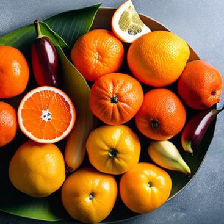

In [3]:
# サンプルデータの取得
# 次に、予測をしたい画像データを取得しましょう。「unknown_vgg.jpg」（リンクからダウンロード可）を未知の画像データとして利用してください。ダウンロード後、Google Colaboratoryに「unknown_vgg.jpg」をアップロードします。

# Google Colaboratoryの画面左のファイルタブをクリックし、「unknown_vgg.jpg」をドラッグアンドドロップしてください。「unknown_vgg.jpg」というファイル名が表示されたら、アップロード完了です。

# 次に、load_img関数で画像を取り込みます。target_sizeパラメータで、取り込み時の画像のサイズを指定できます。なお、VGG16の可視化によって、インプットデータの構造が「任意のサンプル数×224×224×3」であることを確認できました。

# VGG16へ画像データを投入するための前処理に手間がかからないよう、target_sizeとして縦224ピクセル×横224ピクセルを指定しましょう。

from tensorflow.keras.preprocessing.image import load_img
unknown_img = load_img('unknown_vgg.jpg', target_size=(224, 224))
unknown_img


In [ ]:
# 以上で、サンプルデータの取得は完了です。

In [4]:
# サンプルデータの前処理
# 続いて、画像データを予測モデルに入力する前に、適切な形式へ変換します。まずは、img_to_array関数で画像をarray形式に変更します。

from tensorflow.keras.preprocessing.image import img_to_array
unknown_array = img_to_array(unknown_img)
unknown_array.shape


(224, 224, 3)

In [5]:
# VGG16の可視化で確認した通り、インプットデータの構造は「任意のサンプル数×224×224×3」です。reshape関数で同じデータ構造に変換します。

unknown_array = unknown_array.reshape((1, 224, 224, 3))
unknown_array.shape


(1, 224, 224, 3)

In [6]:
# 「任意のサンプル数×224×224×3」の形式に変換できました。

# 6,9章における画像ファイルの取り込みでは、この次のプロセスとしてスケーリング（unknown_arrayを構成する各数値を255で割る操作）を行っていました。今回は前処理方法を変更し、VGG16のpreprocess_input関数を利用して、前処理を実施します。この関数は、VGG16用に前処理が実行できる関数です。

from tensorflow.keras.applications.vgg16 import preprocess_input
unknown_array = preprocess_input(unknown_array)


In [ ]:
# 以上でサンプルデータの前処理は完了です。

In [7]:
# 予測
# 次に、VGG16を使って画像データの予測をします。
result = model.predict(unknown_array)


1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step


In [8]:
# 次に、resultを表示します。
result


array([[9.71153025e-09, 4.49926972e-07, 3.45244455e-09, 7.72993891e-10,
        1.43083628e-10, 7.22218341e-10, 6.72162770e-10, 3.48270497e-08,
        3.00848342e-07, 1.96119357e-10, 1.14064997e-08, 2.64436260e-08,
        8.11120771e-09, 2.23765340e-09, 7.03612546e-09, 7.90966965e-07,
        3.03595357e-07, 2.62281308e-08, 9.13369291e-08, 1.45169299e-09,
        3.33621242e-09, 4.91824859e-10, 3.44318352e-10, 4.91261365e-10,
        5.55063717e-10, 5.28398569e-09, 1.56928925e-09, 2.42195086e-09,
        3.61675090e-09, 8.63145377e-09, 1.37639755e-09, 3.29479377e-08,
        1.41200274e-09, 1.88790494e-09, 5.35738787e-09, 2.07668394e-09,
        1.91919138e-08, 1.98309511e-08, 1.71918577e-10, 8.45742232e-09,
        6.33984021e-09, 1.27820521e-09, 4.40885772e-10, 1.55825641e-09,
        1.35141620e-10, 1.99664352e-09, 1.60611577e-08, 2.94107072e-09,
        1.48835652e-10, 1.26440813e-09, 1.24330568e-09, 3.54396978e-09,
        1.16867738e-09, 6.35270336e-10, 7.46813056e-10, 8.633413

In [9]:
# 予測結果として、1000種類のカテゴリそれぞれに属する確率が表示されています。ImageNetデータセットで事前学習されたVGG16は、1000カテゴリそれぞれに属する確率を出力するように学習されているためです。なお、1000カテゴリの詳細については、以下を参照してください。
# IMAGENET 1000 Class List - WekaDeeplearning4j (waikato.ac.nz)

# decode_predictions関数を利用すると、可能性の高い上位5つのカテゴリと、そのカテゴリに属する確率が表示されます。
from tensorflow.keras.applications.vgg16 import decode_predictions
decode_predictions(result)


35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step


[[('n07747607', 'orange', 0.8505875),
  ('n07753592', 'banana', 0.06312941),
  ('n07749582', 'lemon', 0.04285308),
  ('n07753275', 'pineapple', 0.027190492),
  ('n07716906', 'spaghetti_squash', 0.0029123812)]]

In [ ]:
# 表示された結果から、インプットした画像は以下の判定結果であることが分かります。

# カテゴリ	確率
# オレンジ	約85.1%
# バナナ	約6.3%
# レモン	約4.3%
# パイナップル	約2.7%
# スパゲティスクウォッシュ	約0.3%
# 以上が、VGG16を利用した画像判定の流れとなります。

In [ ]:
# # # # VGG16を転移学習する流れのイメージ
# # # # VGG16を使って画像を判定する流れを先述しました。ImageNetで学習させたVGG16は、1000のカテゴリに分類するための予測モデルです。新しい用途（例えば犬と猫の2種類のうち、どちらであるかを分類したい場合など）に対応させるためには、どうすればよいのでしょうか。この解決策が、転移学習です。

# # # # ここでは、VGG16を転移学習する流れ（一例）のイメージを紹介します。手順は以下の通りです。順に説明していきます。

# # # # VGG16の全結合層以外の取得
# # # # 独自の全結合層の追加
# # # # 独自の全結合層部分のみの学習
# # # # 予測
# # # # 1. VGG16の全結合層以外の取得
# # # # まず、VGG16から全結合層を除外します。VGG16をインスタンス化する際に、引数にinclude_top=Falseオプションを指定することで、VGG16の全結合層以外の部分のみを取得できます。



# # # 独自の全結合層の追加
# # # 次に、独自の全結合層を追加します。Sequentialクラスを使って独自の全結合層を作成し、VGG16に追加します。この独自の全結合層は、ノード数や活性化関数を自由に設定可能です。これによって、VGG16からのアウトプットデータを、目的に応じてカスタマイズできます。



# # 独自の全結合層部分のみの学習
# # 次に、VGG16由来の部分のパラメータを固定し、独自の全結合層のパラメータのみを学習させます。これにより、VGG16の高い性能を利用しながら、目的に応じた予測モデルを構築できます。また、追加の全結合層のみを学習させることで、学習にかかる計算コストの抑制も可能です。

# ※VGG由来の部分の一部、または全部も含めて、パラメータを最適化する手法もあります。

# 予測
# 学習が完了したら、未知の画像データの判定をします。元のVGG16は1000カテゴリに属する確率を予測するモデルでしたが、1から3のプロセスを経ることで、新たなタスクに対応できるようになります。例えば、犬か猫かといった2カテゴリの判定などが可能です。

# VGG16を転移学習するイメージの解説は以上です


In [ ]:
# 転移学習用の画像データ準備
# 転移学習を行うためには、学習するための画像データが必要です。本教材では、Google Colaboratoryで転移学習のソースコードを作成します。そのため、Google ColaboratoryからアクセスしやすいGoogleドライブに学習用の画像データを格納します。

# ここでは、画像データの準備方法について解説します。画像データの準備の流れは、以下の通りです。順に解説します。

# Googleドライブ上での画像データ格納用フォルダの作成
# 画像データの取得
# Googleドライブへのアップロード


# Googleドライブ上での画像データ格納用フォルダの作成
# Googleドライブ上に、画像データの保管フォルダを用意します。以下のようなフォルダ構成を作成します。


# my drive---date train--dog
#          |           |
#          |           |--cat
#          |            
#          |--date_test--dog
#                      |
#                      |--cat           

# まずは、マイドライブの最上位の階層に、学習データ保管用の「data_train」と、テストデータ保管用の「data_test」という名称のフォルダを作成してください。
# 作成した「data_train」フォルダの内部に、「dog」と「cat」という名称のフォルダを作成します。
# 同様に「data_test」フォルダ内部にも、「dog」と「cat」という名称のフォルダを作成します。
# 以上で、Googleドライブ上での画像データ格納用フォルダの作成は完了です。



In [ ]:
# 画像データの取得
# 次に、犬と猫の画像データを用意します。MicrosoftのサイトのDawnloadボタンから、「kagglecatsanddogs_5340.zip」ファイルをダウンロードできます。

# ダウンロードした「kagglecatsanddogs_5340.zip」ファイルを解凍すると、その内部のCatフォルダに12,500枚の猫の写真（0.jpg, 1.jpg, …12499.jpg）と、Dogフォルダに12,500枚の犬の写真（0.jpg, 1.jpg, …12499.jpg）が格納されています。以上で、画像データの取得は完了です。

In [ ]:
# Googleドライブへのアップロード
# ダウンロードした犬と猫の画像データを、Googleドライブにアップロードします。犬と猫の画像データを、それぞれ以下のように格納してください。

# ダウンロードした画像	格納先
# Dogフォルダの0.jpg～255.jpgの計256ファイル	マイドライブ > data_train > dog
# Catフォルダの0.jpg～255.jpgの計256ファイル	マイドライブ > data_train > cat
# Dogフォルダの256.jpg～319.jpgの計64ファイル	マイドライブ > data_test > dog
# Catフォルダの256.jpg～319.jpgの計64ファイル	マイドライブ > data_test > cat

# これらの画像データは、次章の転移学習で利用します。以上で、転移学習用の画像データの準備は完了です。

In [ ]:
# 引き続き、学習済みの予測モデルであるVGG16を活用した転移学習を実施し、犬と猫の画像を識別する予測モデルの構築方法を学びます。本章では、以下を目標にして学習します。

# ImageDataGeneratorを利用した学習データのセットアップ方法を学ぶこと
# VGG16を活用した転移学習の実施方法を学ぶこと
# 予測モデルの保存方法と読み込み方法を学ぶこと
# 本章ではまず、ImageDataGeneratorと呼ばれるKerasのクラスを利用して、前章で準備した学習データのセットアップを行います。その後、[VGG16](#heading=h.a7st29e4udn1)をカスタマイズし転移学習を実施します。それでは、VGG16の予測モデルを、異なるタスクに活用する転移学習のプロセスを体験していきましょう。

In [ ]:
# 転移学習の実行の流れ
# はじめに、VGG16を転移学習して犬と猫の画像分類をする、本章全体の流れを記載します。順に解説していきます。

# GPUへの切り替え
# 乱数の固定
# Googleドライブのマウント
# 学習データのセットアップ
# VGG16の全結合層以外の取得
# 予測モデル（全結合層を除くVGG16）の可視化
# VGG16のSequentalモデルへの変換
# VGG16のパラメータ凍結
# 独自の全結合層の追加
# 予測モデル（VGG16 + 独自の全結合層）の可視化
# 誤差関数、最適化方法、評価指標の設定
# 学習
# 評価
# 予測